In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "build")))

In [2]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [3]:
from cipells.experiments import TruncatedGaussian, Gaussian

In [13]:
psf = TruncatedGaussian(scaling=2.0, s1=1.0, s2=4.0, n=8)

In [113]:
np.random.seed(1)
n = 256
x = np.arange(n, dtype=float)
k = np.concatenate([x, x - n])
z = np.zeros(n, dtype=float)
points = (n/2)*np.random.rand(10) + n/4
fluxes = np.random.rand(10)
for p, f in zip(points, fluxes):
    z += psf(x - p)*f
noise = 0.01*np.random.randn(n)
noise[:32] = 0
noise[-32:] = 0

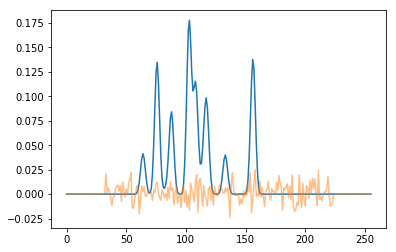

In [114]:
pyplot.plot(x, z)
pyplot.plot(x, noise, alpha=0.5)

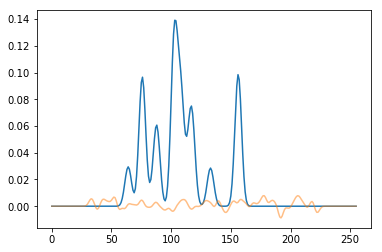

In [115]:
psi1 = np.dot(psf(np.subtract.outer(x, x)), z)
pnoise1 = np.dot(psf(np.subtract.outer(x, x)), noise)
pyplot.plot(x, psi1)
pyplot.plot(x, pnoise1, alpha=0.5)

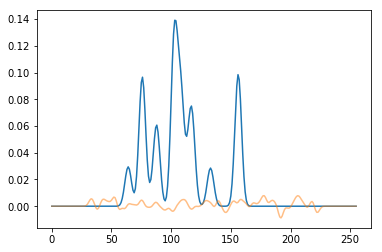

In [116]:
f_z = np.fft.rfft(z, n=2*n)
f_noise = np.fft.rfft(noise, n=2*n)
f_psf = np.fft.rfft(psf(k))
f_psi2 = f_z*f_psf
f_pnoise2 = f_noise*f_psf
psi2 = np.fft.irfft(f_psi2, n=2*n)[:n]
pnoise2 = np.fft.irfft(f_pnoise2, n=2*n)[:n]
pyplot.plot(x, psi2)
pyplot.plot(x, pnoise2, alpha=0.5)

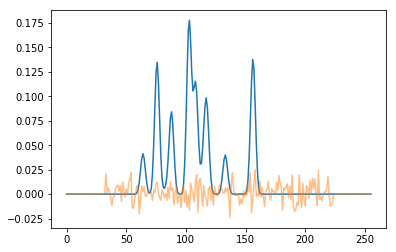

In [117]:
f_psi1 = np.fft.rfft(psi1, n=2*n)
f_pnoise1 = np.fft.rfft(pnoise1, n=2*n)
f_cz1 = f_psi1/f_psf
f_cnoise1 = f_pnoise1/f_psf
cz1 = np.fft.irfft(f_cz1, n=2*n)[:n]
cnoise1 = np.fft.irfft(f_cnoise1, n=2*n)[:n]
pyplot.plot(x, cz1)
pyplot.plot(x, cnoise1, alpha=0.5)

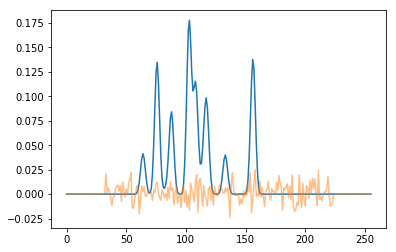

In [118]:
f_cz2 = f_psi2/f_psf
f_cnoise2 = f_pnoise2/f_psf
cz2 = np.fft.irfft(f_cz2, n=2*n)[:n]
cnoise2 = np.fft.irfft(f_cnoise2, n=2*n)[:n]
pyplot.plot(x, cz2)
pyplot.plot(x, cnoise2, alpha=0.5)

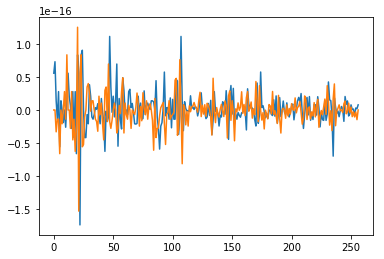

In [119]:
pyplot.plot(f_pnoise1.real - f_pnoise2.real)
pyplot.plot(f_pnoise1.imag - f_pnoise2.imag)

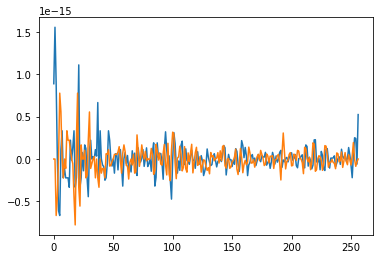

In [120]:
pyplot.plot(f_psi1.real - f_psi2.real)
pyplot.plot(f_psi1.imag - f_psi2.imag)

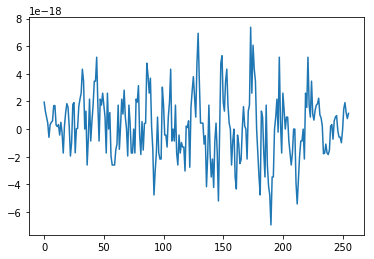

In [121]:
pyplot.plot(pnoise1 - pnoise2)

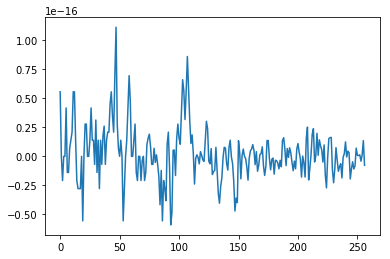

In [122]:
pyplot.plot(np.abs(f_pnoise1) - np.abs(f_pnoise2))

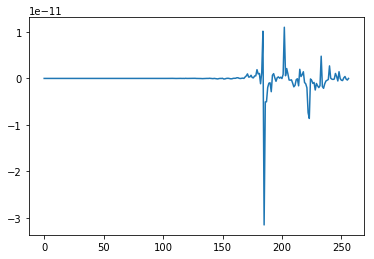

In [123]:
pyplot.plot(np.angle(f_pnoise1) - np.angle(f_pnoise2))

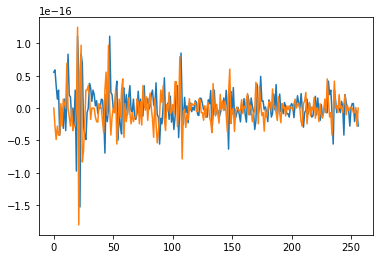

In [124]:
f_pnoise1a = np.fft.rfft(pnoise1, n=2*n)
f_pnoise2a = np.fft.rfft(pnoise2, n=2*n)
pyplot.plot(f_pnoise1a.real - f_pnoise2a.real)
pyplot.plot(f_pnoise1a.imag - f_pnoise2a.imag)